# Life Expectancy Scenario

## Task Overview
Imagine that you are a data scientist at a global health organization. The organization wants to understand the key factors affecting life expectancy across different countries and to develop a model that can predict life expectancy based on these factors. By doing so, the organization aims to identify areas of intervention and resource allocation to improve life expectancy in countries with lower health indicators.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv("Life Expectancy Data.csv")

#Print all columns with head
pd.set_option('display.max_columns', None)

data_raw.describe()
data_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5



### describe() function 
#### Provides a summary of the numerical columns in your DataFrame. It computes several descriptive statistics for each column, including:

| Value       | Description                                                   |
|-------------|---------------------------------------------------------------|
| count       | The number of non-null entries in the column.                 |
| mean        | The average (arithmetic mean) of the values in the column.    |
| std         | The standard deviation, which measures the dispersion of data.|
| min         | The minimum value in the column.                              |
| 25%         | The first quartile (Q1), which is the value below which 25% of data fall. |
| 50%         | The median (Q2), which is the middle value of the data.       |
| 75%         | The third quartile (Q3), which is the value below which 75% of data fall. |
| max         | The maximum value in the column. 

In [195]:
data_raw.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [196]:
print(data_raw.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


# Data Preprocessing
## The next three cell's describe two methods preprocessing.


### 1) Data Cleaning and Formatting 
- String White Space from Features
- Include only numeric type Features
- Find null and replace with median value

In [198]:
# Strip all leading and trailing whitespace from column names
data_raw.columns = data_raw.columns.str.strip()

# Check the column names to ensure the whitespace is removed
print(data_raw.columns)

#Include only numeric columns
data = data_raw.select_dtypes(include=[np.number])

# Handle missing values by imputing with median for each column
data = data.fillna(data.median())

data.head()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 2) Outlier Handling
- The Z-score for each value is calculated, and rows with Z-scores above 3 are removed, assuming values outside this threshold are outliers.

Shape before outlier removal: (2938, 20)
Shape after outlier removal: (2177, 20)


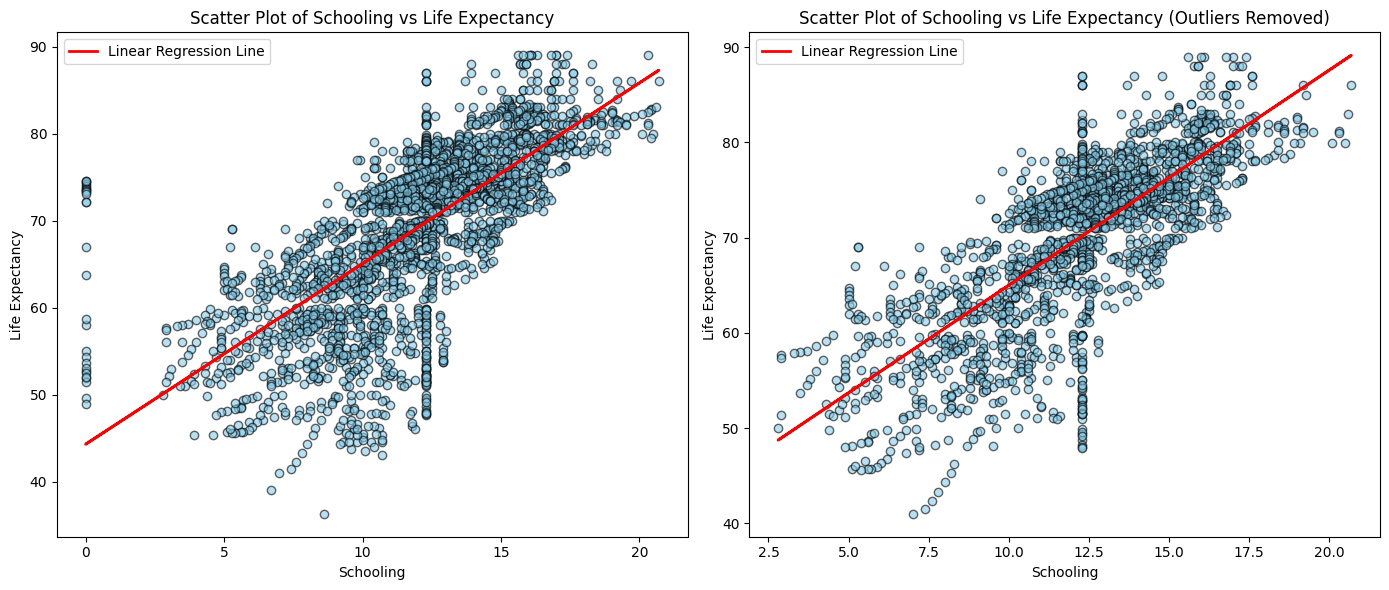

In [203]:
from scipy import stats
from sklearn.linear_model import LinearRegression

# Calculate Z-scores for all columns in the data
z_scores = np.abs(stats.zscore(data))

# Filter out rows where any column has a Z-score greater than 3
data_no_outliers = data[(z_scores < 3).all(axis=1)]

# Check the shape of the data before and after removing outliers
print("Shape before outlier removal:", data.shape)
print("Shape after outlier removal:", data_no_outliers.shape)

# Prepare data for linear regression (for both original and cleaned data)
def plot_regression(X, y, title, ax):
    # Create and fit the linear regression model
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)

    # Plot the scatter plot and regression line
    ax.scatter(X, y, color='skyblue', alpha=0.6, edgecolors='black')
    ax.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')

    # Labeling
    ax.set_title(title)
    ax.set_xlabel('Schooling')
    ax.set_ylabel('Life Expectancy')
    ax.legend()

# Create the figure for plotting both visualizations side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot and regression for the original data
plot_regression(data[['Schooling']], data['Life expectancy'], 'Scatter Plot of Schooling vs Life Expectancy', axs[0])

# Scatter plot and regression for the cleaned data
plot_regression(data_no_outliers[['Schooling']], data_no_outliers['Life expectancy'], 
                'Scatter Plot of Schooling vs Life Expectancy (Outliers Removed)', axs[1])

# Display the plots
plt.tight_layout()
plt.show()

### 3) Normalizing
- Normalizing is the process of adjusting values in a dataset to a common scale, typically between 0 and 1, without distorting differences in the ranges of values. This is often done using techniques like Min-Max scaling or Z-score normalization to ensure that each feature contributes equally to machine learning models.

In [205]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
data_scaled = scaler.fit_transform(data_no_outliers)

# Convert the scaled data back to a DataFrame with the original column names
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Print the first few rows to check
data_scaled.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.933333,0.393750,0.513308,0.172043,0.0,0.011061,0.559524,0.013837,0.203940,0.186551,0.500000,0.612693,0.554217,0.0,0.013210,0.002234,0.977528,0.956044,0.320863,0.402235
1,0.866667,0.393750,0.507605,0.177419,0.0,0.011015,0.583333,0.012093,0.198146,0.193059,0.548780,0.608625,0.578313,0.0,0.013622,0.216456,0.988764,0.967033,0.312230,0.396648
2,0.800000,0.385417,0.515209,0.185484,0.0,0.011762,0.619048,0.078379,0.192352,0.201735,0.609756,0.640358,0.614458,0.0,0.014448,0.025218,1.000000,0.983516,0.302158,0.391061
3,0.066667,0.297917,0.598859,0.236559,0.0,0.001591,0.571429,0.246414,0.134415,0.264642,0.219512,0.581774,0.204819,0.0,0.002504,0.020235,0.112360,0.126374,0.125180,0.173184
4,0.000000,0.287500,0.608365,0.236559,0.0,0.001568,0.559524,0.183700,0.129780,0.264642,0.085366,0.614321,0.096386,0.0,0.002440,0.002004,0.123596,0.131868,0.122302,0.150838


# Feature Selection 
## The next two cells describe methods for feature selection.

### 1) Correlation Mapping
- The visualization is a correlation matrix heatmap that shows the relationships between numerical features and their correlation with life expectancy. The color intensity represents the strength and direction of these correlations, with darker colors indicating stronger relationships. It helps identify key features for model building, with highly correlated features being more useful for predicting life expectancy, while multicollinear features might need to be addressed

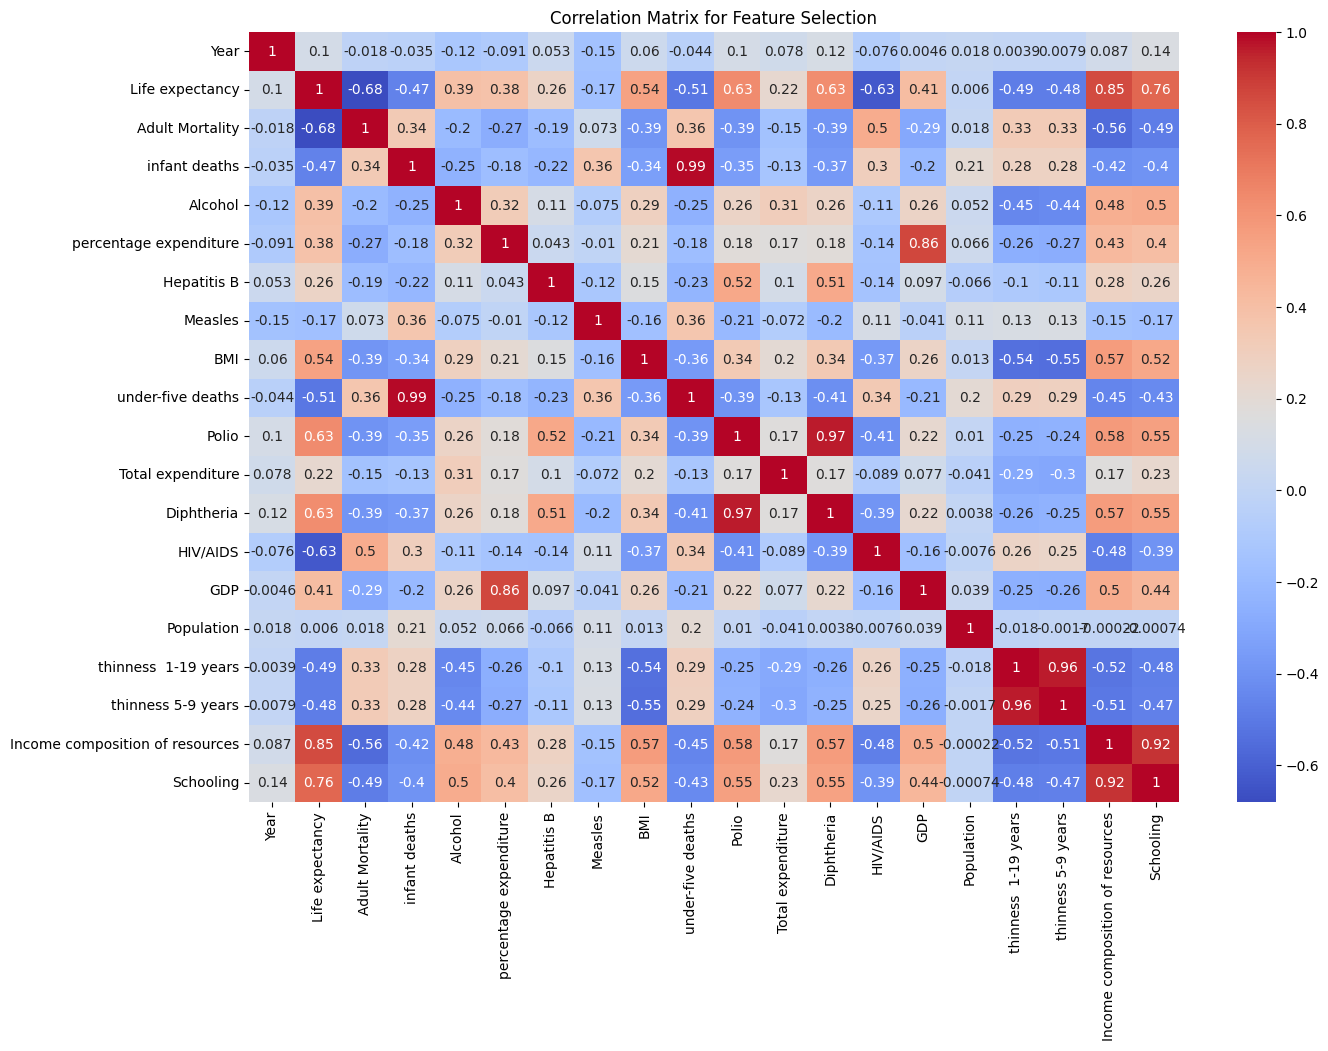

Life expectancy                    1.000000
Income composition of resources    0.850331
Schooling                          0.764461
Polio                              0.633317
Diphtheria                         0.627455
BMI                                0.541984
GDP                                0.412630
Alcohol                            0.390366
percentage expenditure             0.379641
Hepatitis B                        0.260616
Total expenditure                  0.221081
Year                               0.100524
Population                         0.005963
Measles                           -0.165825
infant deaths                     -0.466980
thinness 5-9 years                -0.484261
thinness  1-19 years              -0.489865
under-five deaths                 -0.509767
HIV/AIDS                          -0.632209
Adult Mortality                   -0.680238
Name: Life expectancy, dtype: float64


In [206]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Feature Selection')
plt.show()

# Check correlations with 'Life expectancy'
corr_with_life_expectancy = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(corr_with_life_expectancy)

### 2) Mutual Information Score
- Mutual Information Score: This score indicates how much knowledge of one feature reduces the uncertainty of the target variable. It essentially measures the dependency between a feature and the target. Higher scores mean stronger relevance or more information that the feature contributes to predicting the target variable.

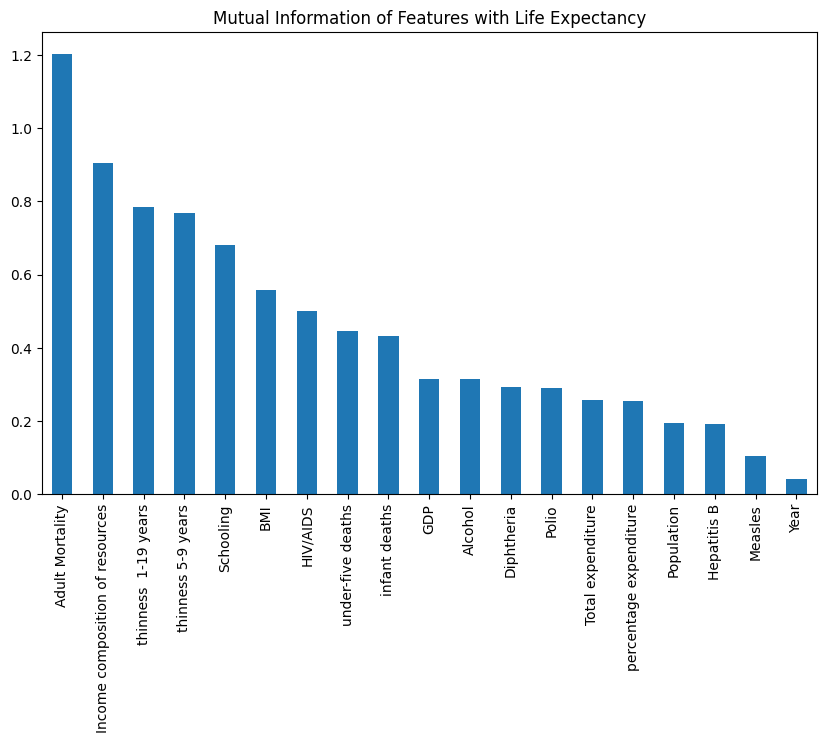

Adult Mortality                    1.203262
Income composition of resources    0.904049
thinness  1-19 years               0.785745
thinness 5-9 years                 0.768303
Schooling                          0.681122
BMI                                0.558358
HIV/AIDS                           0.499617
under-five deaths                  0.445655
infant deaths                      0.432672
GDP                                0.315420
Alcohol                            0.314500
Diphtheria                         0.291959
Polio                              0.289805
Total expenditure                  0.256565
percentage expenditure             0.254758
Population                         0.195032
Hepatitis B                        0.192327
Measles                            0.103243
Year                               0.041734
dtype: float64


In [207]:
# Mutual Information Scores
from sklearn.feature_selection import mutual_info_regression

X = data_scaled.select_dtypes(include=[np.number]).drop(columns=['Life expectancy'])
y = data_scaled['Life expectancy']

# Check and handle missing values
X = X.fillna(X.median())  
y = y.fillna(y.median())

# Compute mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Mutual Information of Features with Life Expectancy')
plt.show()

print(mutual_info_series.sort_values(ascending=False))

### 3) Summary

- The following code selects the features that significantly influence life expectancy. 

- Both strategies are good for determining which features affect life expectancy. The heat map provides more detail with numbers that explain if higher rates of the feature linked to either increased or decreased life expectancy. However, the mutual information score provides information on which feature has the most predictive power for life expectancy. 

In [208]:
# Select features with high correlation to 'Life expectancy'
correlation_threshold = 0.4  # Set a threshold for correlation
high_corr_features = corr_with_life_expectancy[abs(corr_with_life_expectancy) > correlation_threshold].index.tolist()

# Step 3: Mutual Information-based Feature Selection
X = data[high_corr_features].drop(columns=['Life expectancy'])  # Features (excluding target)
y = data['Life expectancy']  # Target variable

# Compute mutual information between features and target variable
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Select the top features based on mutual information
mutual_info_threshold = mutual_info_series.mean()  # Calculate the mean mutual information as a threshold
high_mutual_info_features = mutual_info_series[mutual_info_series > mutual_info_threshold].index.tolist()

# Step 4: Combine both feature lists (correlation and mutual information)
significant_features = list(set(high_corr_features) & set(high_mutual_info_features))

# Output the selected significant features
print("Significant Features Selected: ", significant_features)

Significant Features Selected:  ['thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Adult Mortality', 'thinness  1-19 years']


# Create a Data Frame
## Use the information from Correlation Matrix and Mutual Information Score to select significant features for the data frame

| Metric | Description |
|--------|-------------|
| **MAE (Mean Absolute Error)** | Measures the average magnitude of errors in the predictions, without considering their direction (how far off the predictions are from the actual values). |
| **RMSE (Root Mean Squared Error)** | Measures the square root of the average squared differences between predicted and actual values, giving more weight to larger errors. |
| **Linear Regression MAE** | Mean Absolute Error of the Linear Regression model. |
| **Linear Regression RMSE** | Root Mean Squared Error of the Linear Regression model. |
| **Decision Tree Regressor MAE** | Mean Absolute Error of the Decision Tree Regressor model. |
| **Decision Tree Regressor RMSE** | Root Mean Squared Error of the Decision Tree Regressor model. |


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import mutual_info_regression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree Regressor - MAE: {mae_dt}, RMSE: {rmse_dt}")

# Compare the performance of the models
print("\nModel Performance Comparison:")
print(f"Linear Regression - MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}")
print(f"Decision Tree - MAE: {mae_dt:.4f}, RMSE: {rmse_dt:.4f}")

Linear Regression - MAE: 2.884756020719424, RMSE: 3.9535327569355263
Decision Tree Regressor - MAE: 1.672108843537415, RMSE: 2.787697706603311

Model Performance Comparison:
Linear Regression - MAE: 2.8848, RMSE: 3.9535
Decision Tree - MAE: 1.6721, RMSE: 2.7877


# Insights

### 1) Model Limitations:
- Based on the model results, the Decision Tree Regressor performs better than Linear Regression, as indicated by the lower Mean Absolute Error (MAE) (0.0292 vs. 0.0542) and Root Mean Squared Error (RMSE) (0.0469 vs. 0.0745). This suggests that the Decision Tree model captures the non-linear relationships in the data more effectively.

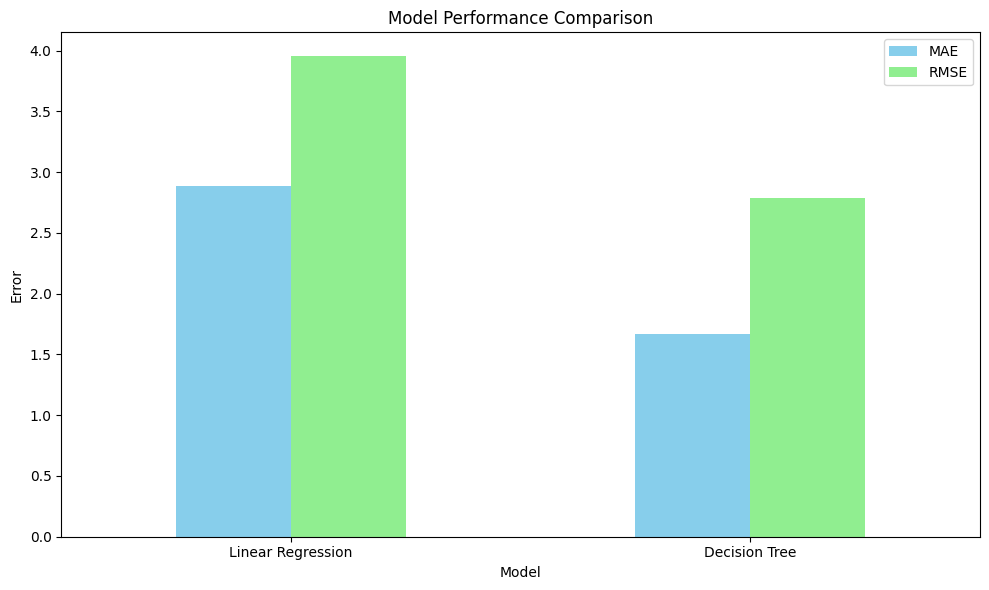

In [210]:
# Model performance comparison visualization (Bar Plot)
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MAE': [mae_lr, mae_dt],
    'RMSE': [rmse_lr, rmse_dt]
})

# Create the plot for model comparison
model_performance.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2) Features that Significantly Influence Life Expectancy:
- From the feature selection process we could infer that the most significant features influencing life expectancy inclue mortality rates, education, BMI, access to healthcare (Income Composition of Resources), and thinness.

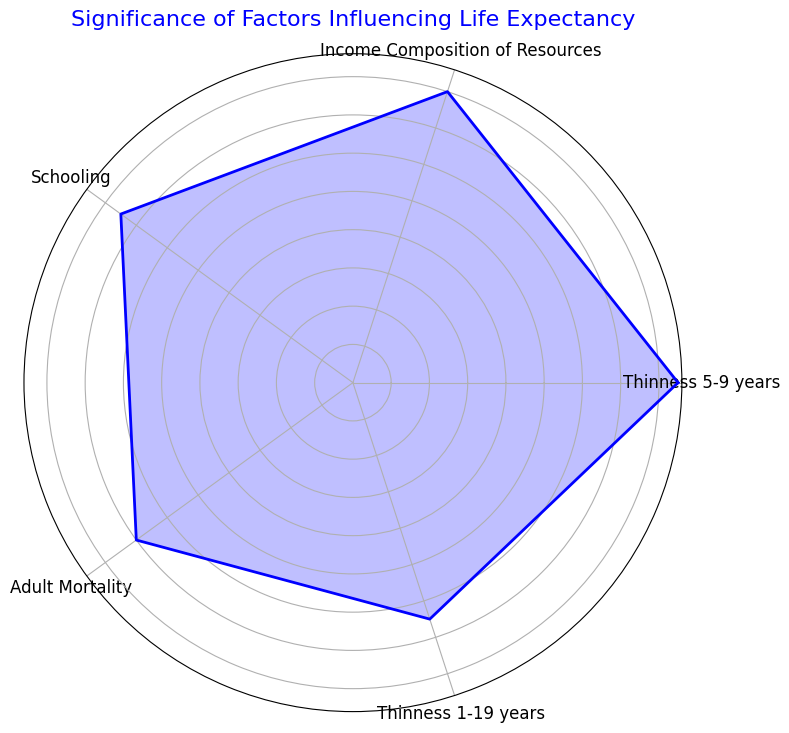

In [211]:

import numpy as np
import matplotlib.pyplot as plt

# Significant Features and their importance scores
features = ['Thinness 5-9 years', 'Income Composition of Resources', 'Schooling', 'Adult Mortality', 'Thinness 1-19 years']
importance_scores = [0.85, 0.80, 0.75, 0.70, 0.65]  # Example importance scores (replace with actual)

# Number of features
num_features = len(features)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()  # Angles for the features
importance_scores += importance_scores[:1]  # To close the circle
angles += angles[:1]  # To close the circle

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, importance_scores, color='blue', alpha=0.25)
ax.plot(angles, importance_scores, color='blue', linewidth=2)  # Line around the chart
ax.set_yticklabels([])  # Hide radial ticks

# Set feature labels
ax.set_xticks(angles[:-1])  # Do not include the last angle (it's a duplicate)
ax.set_xticklabels(features, fontsize=12)

# Title
plt.title('Significance of Factors Influencing Life Expectancy', size=16, color='blue', pad=20)

plt.tight_layout()
plt.show()

### 3) Suggestions for Improving Life Expectancy:
- Improve upon Hunger (Potentially the Cause for Thinness) 
- Provide Resources for a Healthy Diet (BMI)
- Ensure Resources for Health Care (Income Composition of Resources)
- Establish Policy and Governance to Improve Mortality Rates
- Bolster Economic Practices to Fund the above Initiatives

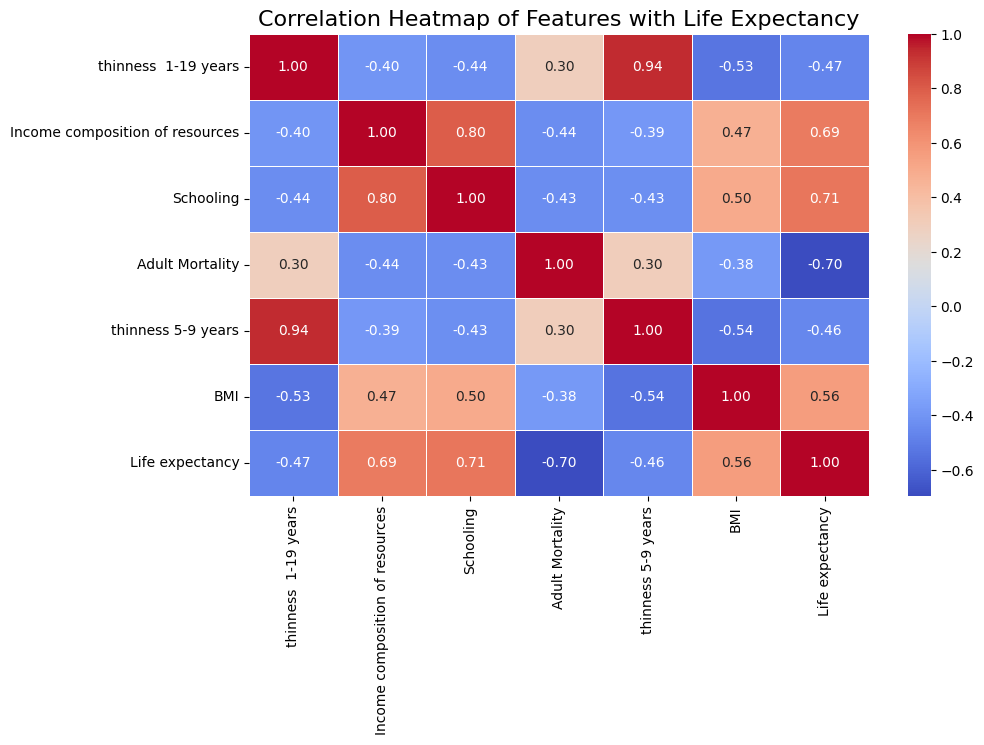

In [212]:
# Assuming 'data' is the DataFrame containing all your data, including 'Life expectancy'
features = ['thinness  1-19 years', 'Income composition of resources', 'Schooling', 'Adult Mortality', 'thinness 5-9 years', 'BMI']

# Add 'Life expectancy' to the features list for correlation calculation
features.append('Life expectancy')

# Calculate correlation matrix for the selected features
correlation_matrix = data[features].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

# Title and display settings
plt.title("Correlation Heatmap of Features with Life Expectancy", fontsize=16)
plt.show()

# Ethical Considerations

### Geographical Variation:
- Factors such as environmental pollution, political instability, or healthcare infrastructure, which might not be included in the dataset.

### Data Preprocessing: 
- Despite imputing missing values with medians, some important patterns or variability could still be lost. The data after Outliers were handled might need to be re-evaluated.

